In [1]:
from itertools import product
from PIL import Image
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plot
from gdalconst import*
from osgeo import ogr
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import random
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.ensemble import RandomForestClassifier

In [2]:
#4 creating variables for band files taken from the landscape file of 2012
#4 bands include - Elevation, Aspect, Slope, Fuel Model Number


#year 2012
band1_12 = '/home/skhatter/exp1/us_130lcp13/band1_.tif'
band2_12 = '/home/skhatter/exp1/us_130lcp13/band2_.tif'
band3_12 = '/home/skhatter/exp1/us_130lcp13/band3_.tif'
band4_12 = '/home/skhatter/exp1/us_130lcp13/band4_.tif'

#this file has cumulative fire frequencies from 1992 - 2012
fireFreq = '/home/skhatter/exp2/summation/fire92_12_.tif'


#opening all the band files using gdal
dataset1_12 = gdal.Open(band1_12, GA_ReadOnly)
dataset2_12 = gdal.Open(band2_12, GA_ReadOnly)
dataset3_12 = gdal.Open(band3_12, GA_ReadOnly)
dataset4_12 = gdal.Open(band4_12, GA_ReadOnly)
dataset_fireFreq = gdal.Open(fireFreq, GA_ReadOnly)


In [3]:
#getting individual bands for 2012
band_fireFreq = dataset_fireFreq.GetRasterBand(1)
band1_12 = dataset1_12.GetRasterBand(1)
band2_12 = dataset2_12.GetRasterBand(1)
band3_12 = dataset3_12.GetRasterBand(1)
band4_12 = dataset4_12.GetRasterBand(1)


band1_12.SetNoDataValue(0)

#get data in the numpy arrays for 2012
data_fireFreq =  np.array(band_fireFreq.ReadAsArray(0,0,band_fireFreq.XSize, band_fireFreq.YSize)) 
data1_12 = np.array(band1_12.ReadAsArray())
data2_12 = np.array(band2_12.ReadAsArray(0,0,band2_12.XSize, band2_12.YSize))
data3_12 = np.array(band3_12.ReadAsArray(0,0,band3_12.XSize, band3_12.YSize))
data4_12 = np.array(band4_12.ReadAsArray(0,0,band4_12.XSize, band4_12.YSize))


In [4]:
#Reshaping the arrays

data1_12 = data1_12.flatten()
data2_12 = np.reshape(data2_12, data2_12.size, order='F')
data3_12 = np.reshape(data3_12, data3_12.size, order='F')
data4_12 = np.reshape(data4_12, data4_12.size, order='F')
data_fireFreq = np.reshape(data_fireFreq, data_fireFreq.size, order='F')

print(data1_12.shape)

(4665108,)


In [5]:
#Creating variables for Fire Parameters

#file for 2013-14 - this file has 1/0 if the fire happened in 2013-2014/ or not
fireParamFile_14 = '/home/skhatter/exp1/fire2014/fire2014_.tif'


#opening the files using gdal
fireDataset_14 = gdal.Open(fireParamFile_14, GA_ReadOnly)


#getting the raster band 1 
fireBand1_14 = fireDataset_14.GetRasterBand(1)


#converting the rasterized values in arrays
data5_14 =  np.array(fireBand1_14.ReadAsArray(0,0,fireBand1_14.XSize, fireBand1_14.YSize))


#reshaping the arrays
data5_14 = np.reshape(data5_14, data5_14.size, order='F')
print(data5_14.shape)

(4665108,)


In [6]:
#creating feature vector using complete data
#5 FEATURES-  Fire Frequency, Elevation, Slope, Aspect, Fuel Model Number
data_t = []
data_t.append(data_fireFreq)
data_t.append(data1_12)
data_t.append(data2_12)
data_t.append(data3_12)
data_t.append(data4_12)
data = np.array(data_t)
print(data.shape)
data = data.T

#feature vector is X
X = data

#target vector is y
y = data5_14

print('Original dataset Shape {}'.format(Counter(y)))

(5, 4665108)
Original dataset Shape Counter({0.0: 4596878, 1.0: 68230})


             Ff         E         A         S        FM     Class
Ff     1.000000 -0.021765  0.246805  0.152234 -0.346138  0.018798
E     -0.021765  1.000000 -0.004875 -0.007552  0.002271  0.007642
A      0.246805 -0.004875  1.000000  0.310003 -0.240521  0.071563
S      0.152234 -0.007552  0.310003  1.000000 -0.162514 -0.021614
FM    -0.346138  0.002271 -0.240521 -0.162514  1.000000 -0.046330
Class  0.018798  0.007642  0.071563 -0.021614 -0.046330  1.000000


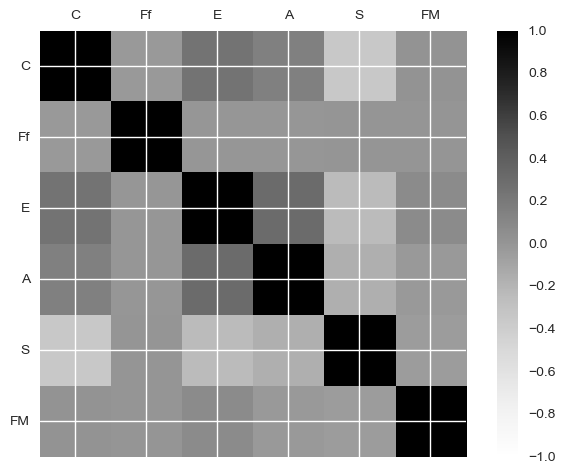

In [7]:
names = ['C','Ff','E', 'A', 'S','FM']
X_pd = pd.DataFrame(X, columns=names[1:])
X_pd['Class'] = y
correlations = X_pd.corr()
print(correlations)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [8]:
#USING ORIGINAL DATASET

#creating test set and training set  using train_test_split
#Split arrays or matrices into random train and test subsets in ratios 80:20
#option stratify is used
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)


print('Training Set Shape {}'.format(Counter(y_train)))
print('Test Set Shape {}'.format(Counter(y_test)))

Training Set Shape Counter({0.0: 3677502, 1.0: 54584})
Test Set Shape Counter({0.0: 919376, 1.0: 13646})


In [9]:
#Solving Class Imbalance problem using- Random Under Sampler

#fitting the training set on Random Under Sampler
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_sample(X_train, y_train)

print('Resampled shape of the training set after applying Random Under Sampler {}'.format(Counter(y_rus)))

#Fitting the Random Under Sampler'd  training set to classifier
classifier_original = RandomForestClassifier()
classifier_original = classifier_original.fit(X_rus, y_rus)

y_predict_test = classifier_original.predict(X_test)

Resampled shape of the training set after applying Random Under Sampler Counter({0.0: 54584, 1.0: 54584})


Confusion matrix, without normalization
[[694121 225255]
 [  3941   9705]]
Normalized confusion matrix
[[ 0.75  0.25]
 [ 0.29  0.71]]


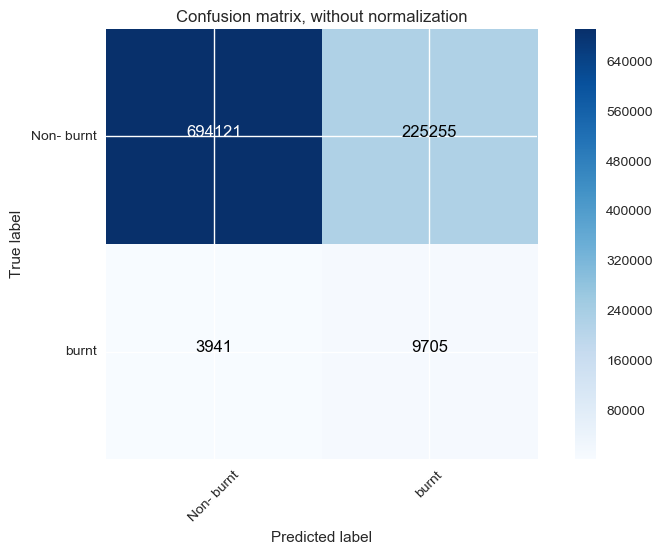

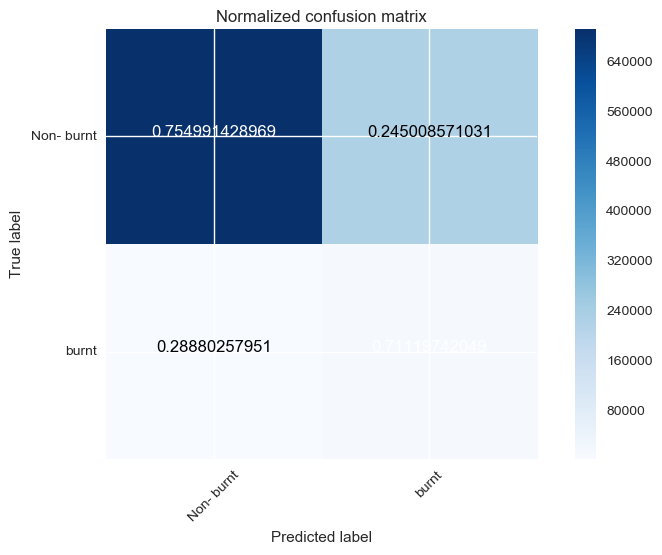

In [10]:
#Confusion matrix 
#C is such that C_{i, j} is equal to the number of observations known to be in group i 
#but predicted to be in group j.
#Thus in binary classification, the count of true negatives is C_{0,0}, 
#false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

class_names = ['Non- burnt', 'burnt']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

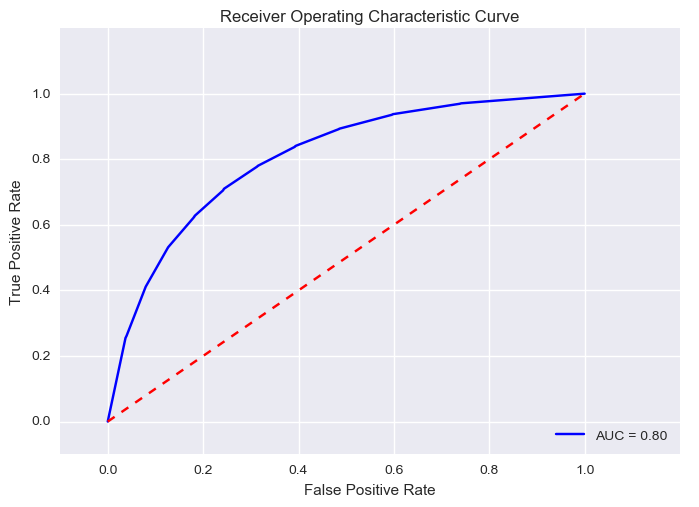

In [11]:
from sklearn.metrics import roc_curve, auc

#finding prediction for class 1 that is class Burnt
y_pred_prob = classifier_original.predict_proba(X_test)[:,1]
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, y_pred_prob)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)



plt.title('Receiver Operating Characteristic Curve')
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label='AUC = %0.2f'% roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
#using Grid Search CV
from sklearn.model_selection import GridSearchCV
from time import time


param_grid = {"n_estimators":[20,30,40,50,60,70,80, 90, 100]
              }

# run grid search
grid_search = GridSearchCV(classifier_original, param_grid=param_grid)
start = time()
grid_search.fit(X_rus, y_rus)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))


GridSearchCV took 200.19 seconds for 9 candidate parameter settings.


In [20]:
# Utility function to report best scores
def report(results, n_top=1):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.742 (std: 0.002)
Parameters: {'n_estimators': 80}

Model with rank: 2
Mean validation score: 0.742 (std: 0.002)
Parameters: {'n_estimators': 70}

Model with rank: 3
Mean validation score: 0.742 (std: 0.002)
Parameters: {'n_estimators': 100}



In [21]:
#Thus after tuning the decision tree using validation set, we test it on the actual test set. and fit the classfier 
#with the complete training set


classifier_tuned = RandomForestClassifier(n_estimators = 80)


#applying random under sampling on complete training set
classifier_tuned = classifier_tuned.fit(X_rus, y_rus)
y_pred_tuned = classifier_tuned.predict(X_test)



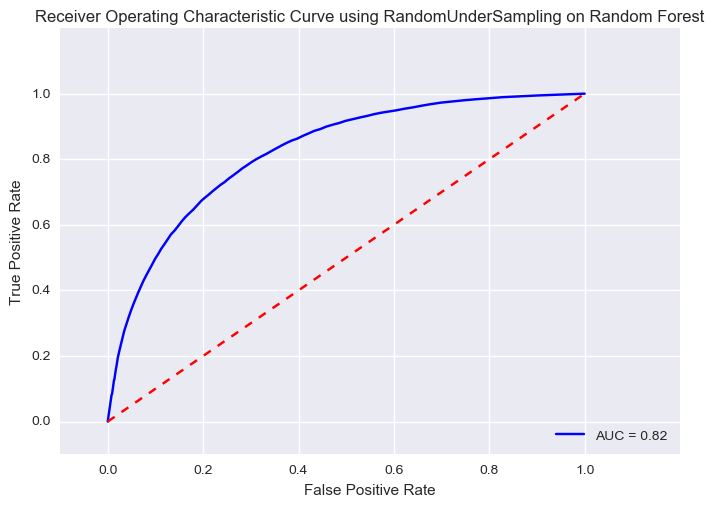

In [22]:
from sklearn.metrics import roc_curve, auc

#finding prediction for class 1 that is class Burnt
y_pred_prob = classifier_tuned.predict_proba(X_test)[:,1]
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, y_pred_prob)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)



plt.title('Receiver Operating Characteristic Curve using RandomUnderSampling on Random Forest')
plt.plot(false_positive_rate_1, true_positive_rate_1, 'b',label='AUC = %0.2f'% roc_auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Confusion matrix, without normalization
[[673772 245604]
 [  3223  10423]]
Normalized confusion matrix
[[ 0.73  0.27]
 [ 0.24  0.76]]


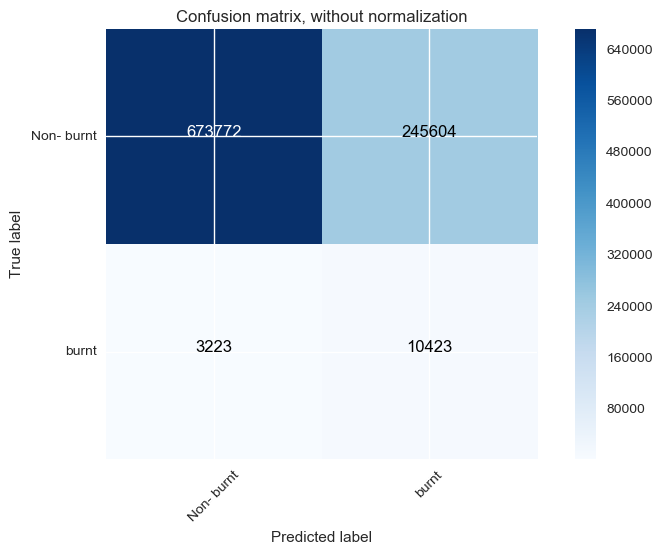

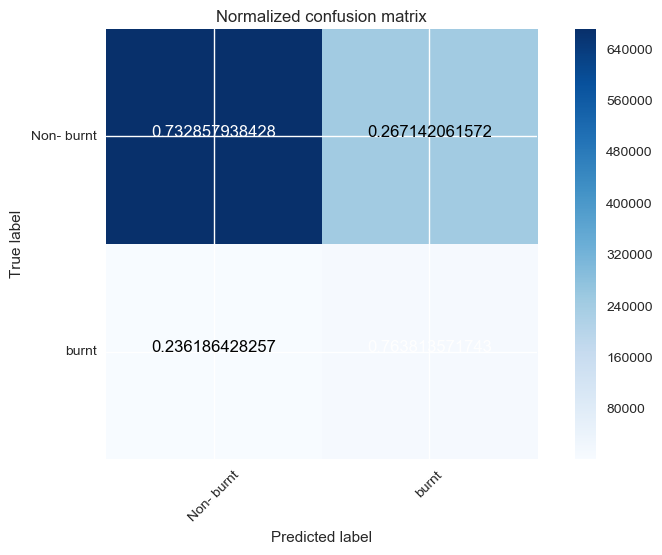

In [16]:
#Confusion matrix  on tuned classifer


#C is such that C_{i, j} is equal to the number of observations known to be in group i 
#but predicted to be in group j.
#Thus in binary classification, the count of true negatives is C_{0,0}, 
#false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

class_names = ['Non- burnt', 'burnt']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_tuned)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

In [31]:
#Preparing a small dataset to use in graphs

data_t = []
data_t.append(data_fireFreq)
data_t.append(data1_12)
data_t.append(data2_12)
data_t.append(data3_12)
data_t.append(data4_12)
data_t.append(data5_14)


#converting to numpy array and transposing the matrix
data = np.array(data_t).T

#Taking 800000 random samples from the dataset
#data_sample is a list, so we need to further convert it to a numpy array
data_sample=random.sample(list(data),800000)
data = np.array(data_sample)


data  = data.T
X_Sample = data[0:5]
X_Sample = X_Sample.T

y_Sample = data[5]
y_Sample = y_Sample.T


#fitting the total set on RANDOM UNDERSAMPLING
rus = RandomUnderSampler(random_state=42)
X_Sample, y_Sample = rus.fit_sample(X_Sample, y_Sample)


In [32]:
#defining the Scatter Plot
def factor_scatter_matrix(df, factor, palette=None, figsize=(10,10), labelpad=50, ax=None):
    '''Create a scatter matrix of the variables in df, with differently colored
    points depending on the value of df[factor].
    inputs:
        df: pandas.DataFrame containing the columns to be plotted, as well 
            as factor.
        factor: string or pandas.Series. The column indicating which group 
            each row belongs to.
        palette: A list of hex codes, at least as long as the number of groups.
            If omitted, a predefined palette will be used, but it only includes
            9 groups.
    '''
    import matplotlib.colors
    import numpy as np
    from pandas.tools.plotting import scatter_matrix
    from scipy.stats import gaussian_kde
    from textwrap import wrap

    if isinstance(factor, str):
        factor_name = factor #save off the name
        factor = df[factor] #extract column
        df = df.drop(factor_name,axis=1) # remove from df, so it 
        # doesn't get a row and col in the plot.

    classes = list(set(factor))

    if palette is None:
        palette = ['#994fa1', '#ff8101', '#fdfc33',
                   '#e41a1c', '#377eb8', '#4eae4b',
                   '#a8572c', '#f482be', '#999999']

    color_map = dict(zip(classes,palette))

    if len(classes) > len(palette):
        raise ValueError('''Too many groups for the number of colors provided.
We only have {} colors in the palette, but you have {}
groups.'''.format(len(palette), len(classes)))

    colors = factor.apply(lambda group: color_map[group])
    axarr = scatter_matrix(df,figsize=figsize,marker='o',c=colors,diagonal=None, ax=ax)

    for rc in range(len(df.columns)):
        for group in classes:
            y = df[factor == group].iloc[:,rc].values
            gkde = gaussian_kde(y)
            ind = np.linspace(y.min(), y.max(), 1000)
            axarr[rc][rc].plot(ind, gkde.evaluate(ind),c=color_map[group])
    
    # Hide tickmarks/ticklabels, and rotate labels
    for i, axs in enumerate(axarr):
        for j, ax in enumerate(axs):
            ax.xaxis.set_ticklabels([])
            ax.yaxis.set_ticklabels([])
            ax.xaxis.set_ticks_position('none') 
            ax.yaxis.set_ticks_position('none')
            # to make x axis name vertical  
            ax.xaxis.label.set_rotation(90)
            # to make y axis name horizontal 
            ax.yaxis.label.set_rotation(0)
            # to make sure y axis names are outside the plot area
            ax.yaxis.labelpad = labelpad
            ax.xaxis.label.set_text('\n'.join(ax.xaxis.label.get_text().split(' ')))
            ax.yaxis.label.set_text('\n'.join(ax.yaxis.label.get_text().split(' ')))

    return axarr

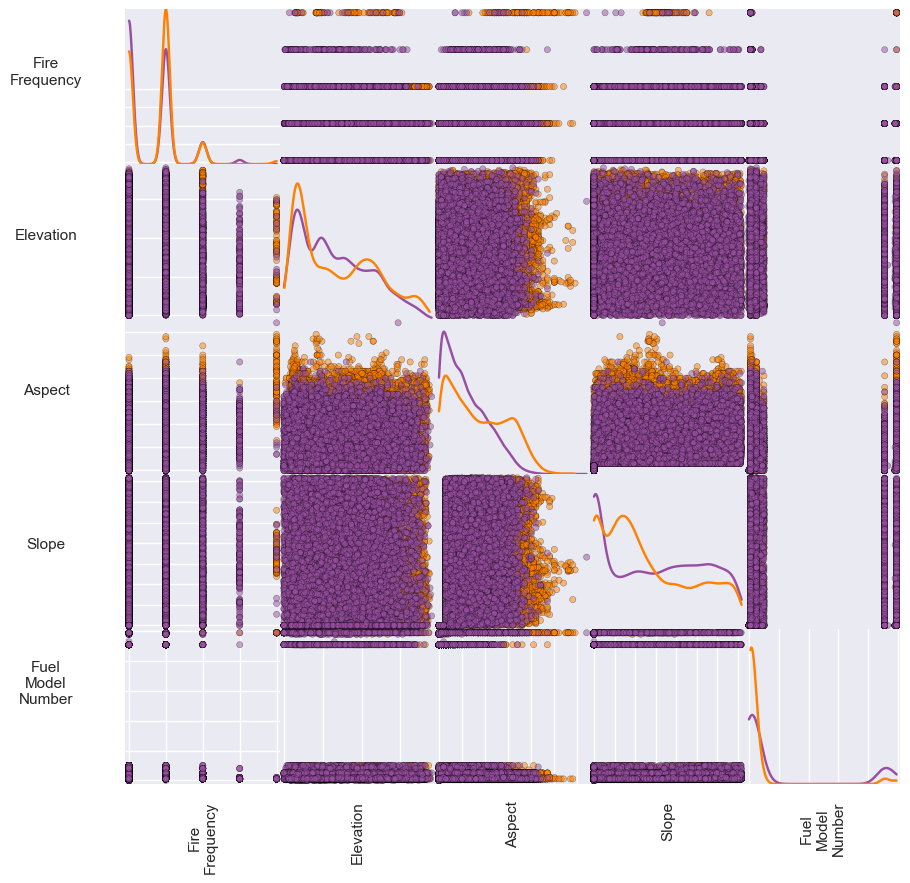

In [33]:
%matplotlib inline
names = ['Class','Fire Frequency','Elevation', 'Aspect', 'Slope','Fuel Model Number']
df_std = pd.DataFrame(X_Sample, columns=names[1:])
df_std['Class'] = y_Sample
axarr = factor_scatter_matrix(df_std,'Class')
